# Árboles de Decisión

## Entrenamiento y visualización de los árboles de decisión

Para entender los árboles de decisiones, construyamos uno y echemos un vistazo a cómo hace predicciones. El siguiente código entrena a un DecisionTreeClassifier en el conjunto de datos del iris (ver Capítulo 4):

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [2]:
from sklearn.tree import export_graphviz

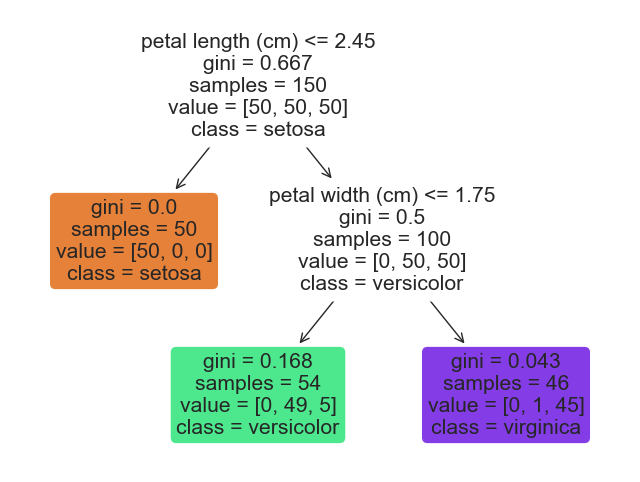

In [3]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(8, 6))
plot_tree(tree_clf,
          feature_names=iris.feature_names[2:],
          class_names=iris.target_names,
          filled=True,
          rounded=True)
plt.show()


## Hacer predicciones

La interpretación es la siguiente:  
Partimos de la raíz y la pregunta que se realiza es si la longitud del pétalo es menor que 2.45. Si la respuesta es sí, la clase de la flor es *setosa*. Ahora bien, si la respuesta es no, la siguiente pregunta es sobre el ancho del pétalo: si es menor o igual a 1.75, entonces la clase es *versicolor*; de lo contrario, la clase sería *virginica*.

El atributo samples de un nodo cuenta cuántas instancias de entrenamiento se aplican a él. Por ejemplo, 100 instancias de entrenamiento tienen una longitud de pétalo mayor que 2.45 cm (profundidad 1, derecha) y, de esas 100, 54 tienen un ancho de pétalo menor que 1.75 cm (profundidad 2, izquierda).

El atributo value de un nodo indica cuántas instancias de entrenamiento de cada clase se aplican a ese nodo. Por ejemplo, el nodo inferior derecho se aplica a 0 Iris setosa, 1 Iris versicolor y 45 Iris virginica.

Finalmente, el atributo gini de un nodo mide su impureza: un nodo es "puro" (gini = 0) si todas las instancias de entrenamiento que se aplican a él pertenecen a la misma clase. Por ejemplo, dado que el nodo de la izquierda en la profundidad 1 solo se aplica a instancias de entrenamiento de Iris setosa, es puro y su puntaje de gini es 0.


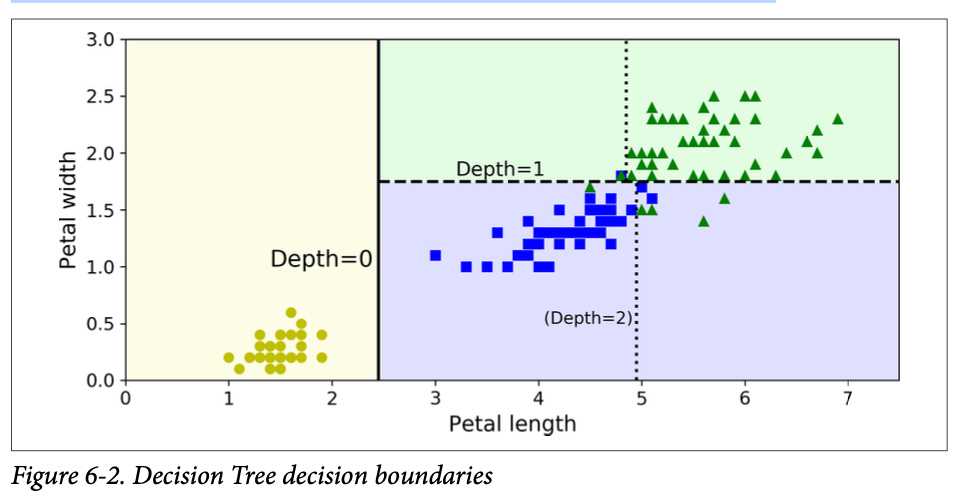

In [4]:
from IPython.display import Image, display

# Ruta al archivo
ruta_imagen = '/Users/erickavendanogarcia/Desktop/ML_physics/Captura de pantalla 2025-02-16 a la(s) 10.32.02 p.m..png'

# Mostrar la imagen
display(Image(filename=ruta_imagen))

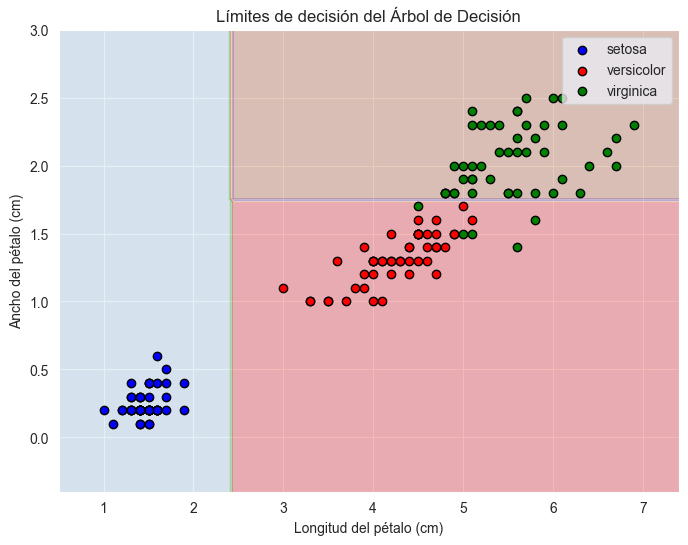

In [5]:
import numpy as np

# Crear una malla de puntos para graficar
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Predecir para cada punto de la malla
Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar los límites de decisión
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

# Graficar los puntos de datos reales
for i, color in zip(range(3), ("blue", "red", "green")):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=iris.target_names[i], edgecolor="k", color=color)

# Etiquetas y título
plt.xlabel("Longitud del pétalo (cm)")
plt.ylabel("Ancho del pétalo (cm)")
plt.legend()
plt.title("Límites de decisión del Árbol de Decisión")
plt.show()


La Figura 6-2 muestra los límites de decisión de este árbol de decisión. La línea vertical gruesa representa el límite de decisión del nodo raíz (profundidad 0): longitud del pétalo = 2.45 cm.

Dado que el área de la izquierda es pura (solo contiene Iris setosa), no puede dividirse más. Sin embargo, el área de la derecha es impura, por lo que el nodo derecho en la profundidad 1 la divide en ancho de pétalo = 1.75 cm (representado por la línea discontinua).

Como max_depth se estableció en 2, el árbol de decisión se detiene ahí. Si se configurara max_depth en 3, entonces los dos nodos de profundidad 2 añadirían otro límite de decisión (representado por las líneas punteadas).

## Estimación de clases de Probabilidad

Un árbol de decisión también puede estimar la probabilidad de que una instancia pertenezca a una clase
k. Primero, recorre el árbol para encontrar el nodo hoja correspondiente a la instancia y luego devuelve la proporción de instancias de entrenamiento de la clase k en ese nodo.

Por ejemplo, supongamos que tienes una flor con pétalos de 5 cm de largo y 1.5 cm de ancho. El nodo hoja correspondiente es el nodo izquierdo de profundidad 2, por lo que el árbol de decisión debería devolver las siguientes probabilidades: 0% para Iris setosa (0/54), 90.7% para Iris versicolor (49/54) y 9.3% para Iris virginica (5/54).

Si se le solicita predecir la clase, debería devolver Iris versicolor (clase 1), ya que tiene la mayor probabilidad. Veamos esto en código:

In [6]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [7]:
tree_clf.predict([[5, 1.5]])

array([1])